# EDA — Mini Superstore Analytics  

Exploratory Data Analysis (EDA) for the Mini Superstore dataset.  
This notebook connects to the SQLite database, builds summary tables, and answers five key analytical questions through visualizations.

## 1. Setup & Environment

In [17]:
import os, sqlite3, pandas as pd
DB_PATH = "../superstore.db"
FIG_DIR = "../reports/figures"
os.makedirs(FIG_DIR, exist_ok=True)

con = sqlite3.connect(DB_PATH)

# 1) list of tables
print("Tables:", pd.read_sql("SELECT name FROM sqlite_master WHERE type='table' ORDER BY 1;", con).squeeze().to_list())

# 2) whole table
superstore = pd.read_sql("""
SELECT 
    oi.order_id,
    o.order_date, o.ship_mode,
    c.customer_id, c.customer_name, c.segment, c.region,
    p.category, p.sub_category, p.product_name,
    oi.sales, oi.quantity, oi.discount, oi.profit
FROM order_items oi
JOIN orders    o ON oi.order_id  = o.order_id
JOIN customers c ON o.customer_id = c.customer_id
JOIN products  p ON oi.product_id = p.product_id;
""", con)

print("Rows/Cols:", superstore.shape)
print(superstore.dtypes)

# 3) quick check
print("NA counts:\n", superstore.isna().sum().sort_values(ascending=False))

Tables: ['customers', 'order_items', 'orders', 'products']
Rows/Cols: (9994, 14)
order_id          object
order_date        object
ship_mode         object
customer_id       object
customer_name     object
segment           object
region            object
category          object
sub_category      object
product_name      object
sales            float64
quantity           int64
discount         float64
profit           float64
dtype: object
NA counts:
 order_id         0
order_date       0
ship_mode        0
customer_id      0
customer_name    0
segment          0
region           0
category         0
sub_category     0
product_name     0
sales            0
quantity         0
discount         0
profit           0
dtype: int64


In [18]:
import os
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

DB_PATH = "/Users/adnannalcaci/Desktop/mini_superstore_analytics/superstore.db"
FIG_DIR = "/Users/adnannalcaci/Desktop/mini_superstore_analytics/reports/figures"
os.makedirs(FIG_DIR, exist_ok=True)

con = sqlite3.connect(DB_PATH)

## 2. Load Base Tables

In [19]:
customers   = pd.read_sql("SELECT * FROM customers;", con)
products    = pd.read_sql("SELECT * FROM products;", con)
orders      = pd.read_sql("SELECT * FROM orders;", con)
order_items = pd.read_sql("SELECT * FROM order_items;", con)

print("customers", customers.shape)
print("products", products.shape)
print("orders", orders.shape)
print("order_items", order_items.shape)

customers (793, 8)
products (1862, 4)
orders (5009, 5)
order_items (9994, 7)


## 3. Build Combined Analysis Table (`superstore`)

In [20]:
query = """
SELECT 
    oi.order_id,
    o.order_date, o.ship_mode,
    c.customer_id, c.customer_name, c.segment, c.region,
    p.category, p.sub_category, p.product_name,
    oi.sales, oi.quantity, oi.discount, oi.profit
FROM order_items oi
JOIN orders    o ON oi.order_id  = o.order_id
JOIN customers c ON o.customer_id = c.customer_id
JOIN products  p ON oi.product_id = p.product_id;
"""
superstore = pd.read_sql(query, con)
print("rows:", len(superstore), "cols:", superstore.shape[1])
superstore.head()

rows: 9994 cols: 14


,order_id,order_date,ship_mode,customer_id,customer_name,segment,region,category,sub_category,product_name,sales,quantity,discount,profit
0,CA-2016-152156,2016-08-11,Second Class,CG-12520,Claire Gute,Consumer,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-08-11,Second Class,CG-12520,Claire Gute,Consumer,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-12-06,Second Class,DV-13045,Darrin Van Huff,Corporate,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## 4. Quick Data Overview

In [21]:
superstore.info()
superstore.describe(include="all").transpose().head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       9994 non-null   object 
 1   order_date     9994 non-null   object 
 2   ship_mode      9994 non-null   object 
 3   customer_id    9994 non-null   object 
 4   customer_name  9994 non-null   object 
 5   segment        9994 non-null   object 
 6   region         9994 non-null   object 
 7   category       9994 non-null   object 
 8   sub_category   9994 non-null   object 
 9   product_name   9994 non-null   object 
 10  sales          9994 non-null   float64
 11  quantity       9994 non-null   int64  
 12  discount       9994 non-null   float64
 13  profit         9994 non-null   float64
dtypes: float64(3), int64(1), object(10)
memory usage: 1.1+ MB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,9994,5009,CA-2017-100111,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_date,9994,1237,2016-05-09,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ship_mode,9994,4,Standard Class,5968,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,9994,793,WB-21850,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_name,9994,793,William Brown,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
segment,9994,3,Consumer,5191,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,9994,4,West,3235,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,9994,3,Office Supplies,6026,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub_category,9994,17,Binders,1523,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_name,9994,1818,Staple envelope,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 5. Basic Cleaning

In [22]:
superstore["order_date"] = pd.to_datetime(superstore["order_date"], errors="coerce")
superstore["ship_mode"] = superstore["ship_mode"].str.strip()
superstore.dropna(subset=["order_date", "sales", "profit"], inplace=True)
print("Cleaned rows:", len(superstore))

Cleaned rows: 9994


## 6. Summary Tables

In [23]:
category_summary = (
    superstore.groupby("category")[["sales","profit"]]
    .sum()
    .sort_values(by="sales", ascending=False)
)
subcat_profit = (
    superstore.groupby("sub_category")["profit"]
    .sum()
    .sort_values(ascending=False)
)
region_summary = (
    superstore.groupby("region")[["sales","profit"]]
    .sum()
    .sort_values(by="profit", ascending=False)
)

print("category_summary shape:", category_summary.shape)
print("region_summary shape:", region_summary.shape)
display(category_summary.head(10), subcat_profit.head(10), region_summary.head(10))

category_summary shape: (3, 2)
region_summary shape: (4, 2)


,sales,profit
category,,
Technology,836154.0330,145454.9481
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008


sub_category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          34053.5693
Binders        30221.7633
Chairs         26590.1663
Storage        21278.8264
Appliances     18138.0054
Furnishings    13059.1436
Envelopes       6964.1767
Name: profit, dtype: float64

,sales,profit
region,,
West,764634.4453,98008.2249
East,611734.2995,94604.3121
Central,518800.1322,63609.3490
South,402031.9833,30175.1357


## 7. Visualization — Category (Sales & Profit)

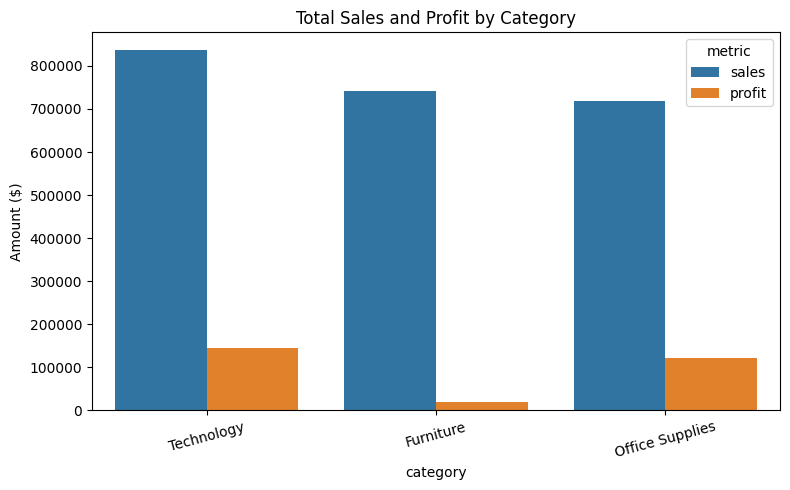

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

FIG_DIR = "../reports/figures"
os.makedirs(FIG_DIR, exist_ok=True)

cat_long = (
    category_summary.reset_index()
    .melt(id_vars="category", value_vars=["sales","profit"], var_name="metric", value_name="amount")
)

plt.figure(figsize=(8,5))
sns.barplot(data=cat_long, x="category", y="amount", hue="metric")
plt.title("Total Sales and Profit by Category")
plt.ylabel("Amount ($)")
plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig(f"{FIG_DIR}/category_sales_profit.png", dpi=150)
plt.show()

## 8. Visualization — Top 10 Most Profitable Sub-Categories

/var/folders/fm/6c4c042j6c5ftgvvpyvgdlh00000gn/T/ipykernel_18172/4293909169.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


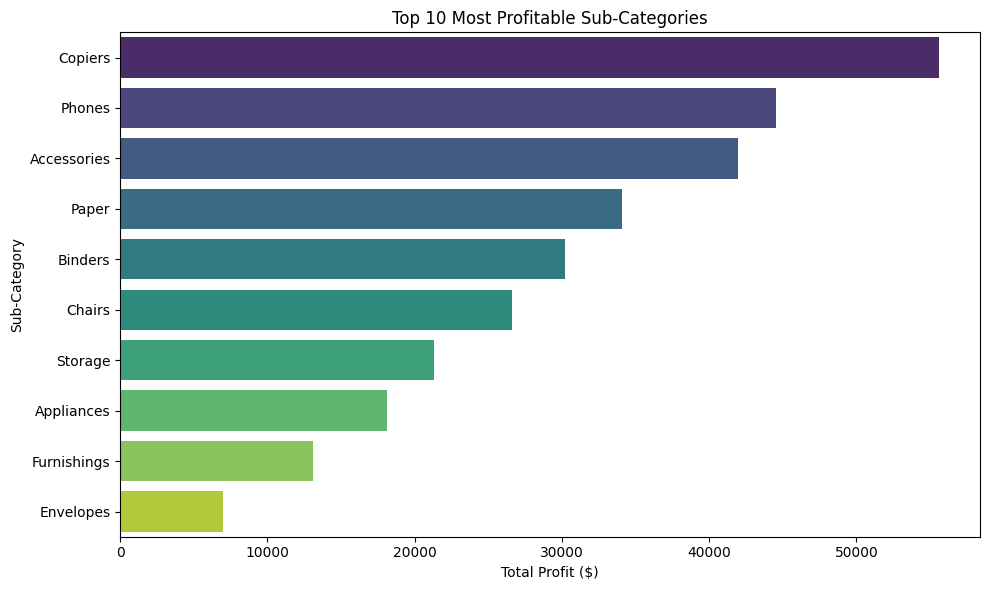

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=subcat_profit.head(10).reset_index(),
    y="sub_category", x="profit", palette="viridis"
)
plt.title("Top 10 Most Profitable Sub-Categories")
plt.xlabel("Total Profit ($)")
plt.ylabel("Sub-Category")
plt.tight_layout()
plt.savefig(f"{FIG_DIR}/top10_subcategories_profit.png", dpi=150, bbox_inches="tight")
plt.show()

## 9. Visualization — Sales & Profit by Region

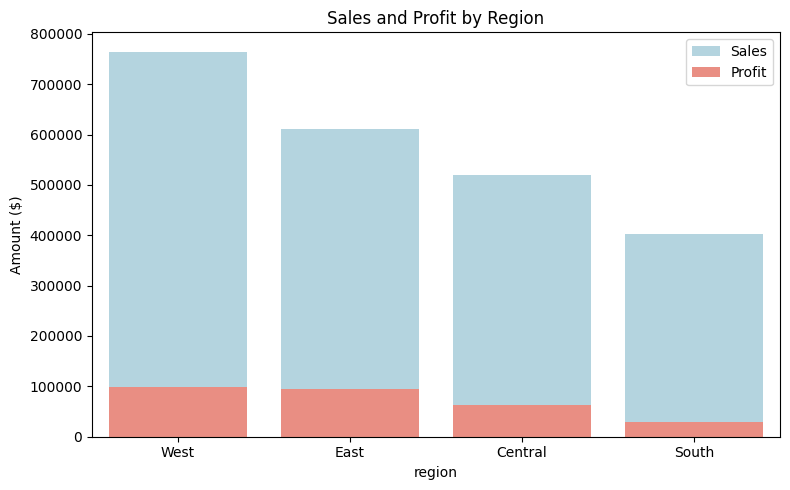

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(data=region_summary.reset_index(), x="region", y="sales", color="lightblue", label="Sales")
sns.barplot(data=region_summary.reset_index(), x="region", y="profit", color="salmon", label="Profit")
plt.title("Sales and Profit by Region")
plt.ylabel("Amount ($)")
plt.legend()
plt.tight_layout()
plt.savefig(f"{FIG_DIR}/region_sales_profit.png", dpi=150, bbox_inches="tight")
plt.show()

# 🧠 Research Questions

Top 5 Most Profitable Products

product_name
Canon imageCLASS 2200 Advanced Copier                                          25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7753.0390
Hewlett Packard LaserJet 3310 Copier                                            6983.8836
Canon PC1060 Personal Laser Copier                                              4570.9347
Logitech G19 Programmable Gaming Keyboard                                       4425.3432
Name: profit, dtype: float64

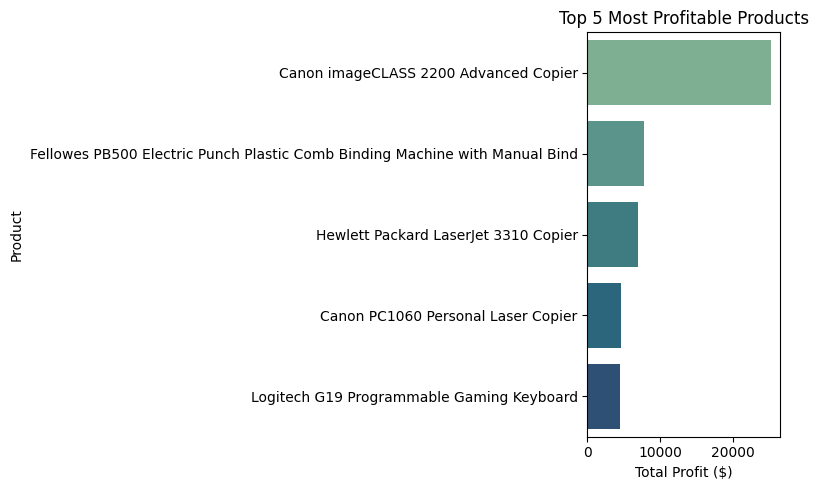

In [ ]:
top5_products = (
    superstore.groupby("product_name")["profit"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)
display(top5_products)

plt.figure(figsize=(8,5))
sns.barplot(
    data=top5_products.reset_index(),
    x="profit",
    y="product_name",
    hue="product_name",
    dodge=False,
    palette="crest",
    legend=False
)
plt.title("Top 5 Most Profitable Products")
plt.xlabel("Total Profit ($)")
plt.ylabel("Product")
plt.tight_layout()
plt.savefig(f"{FIG_DIR}/top5_products.png", dpi=150, bbox_inches="tight")
plt.show()

Profit Margin by Category and Region

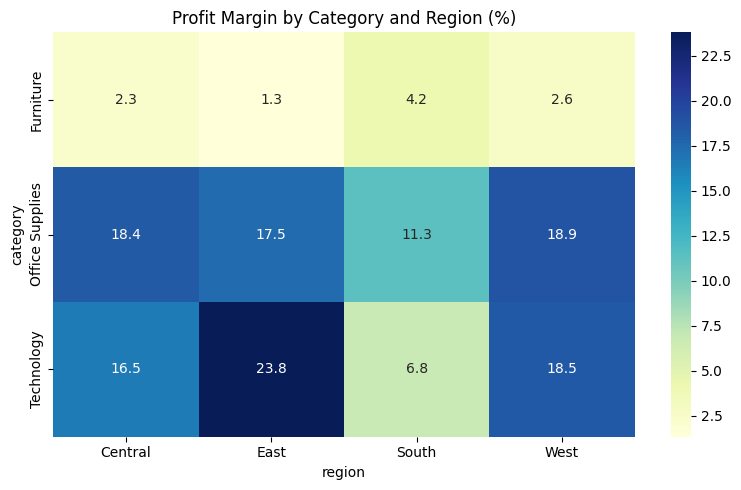

In [28]:
margin_df = (
    superstore.groupby(["category", "region"])
    .agg({"sales": "sum", "profit": "sum"})
    .assign(profit_margin=lambda x: (x["profit"] / x["sales"]) * 100)
    .reset_index()
)

pivot = margin_df.pivot(index="category", columns="region", values="profit_margin")

plt.figure(figsize=(8, 5))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Profit Margin by Category and Region (%)")
plt.tight_layout()
plt.savefig(f"{FIG_DIR}/category_region_heatmap.png", dpi=150, bbox_inches="tight")
plt.show()

Customer Segment Loss Rate

segment
Consumer       0.193219
Corporate      0.184106
Home Office    0.174986
Name: loss_flag, dtype: float64

/var/folders/fm/6c4c042j6c5ftgvvpyvgdlh00000gn/T/ipykernel_18172/2716474596.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_loss_rate.index, y=segment_loss_rate.values, palette="mako")


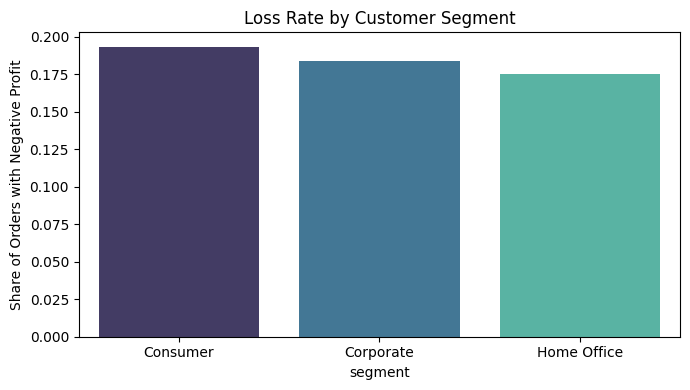

In [29]:
segment_loss_rate = (
    superstore.assign(loss_flag=superstore["profit"] < 0)
    .groupby("segment")["loss_flag"]
    .mean()
    .sort_values(ascending=False)
)
display(segment_loss_rate)

plt.figure(figsize=(7,4))
sns.barplot(x=segment_loss_rate.index, y=segment_loss_rate.values, palette="mako")
plt.title("Loss Rate by Customer Segment")
plt.ylabel("Share of Orders with Negative Profit")
plt.tight_layout()
plt.savefig(f"{FIG_DIR}/segment_loss_rate.png", dpi=150, bbox_inches="tight")
plt.show()

Yearly Sales and Profit Trend

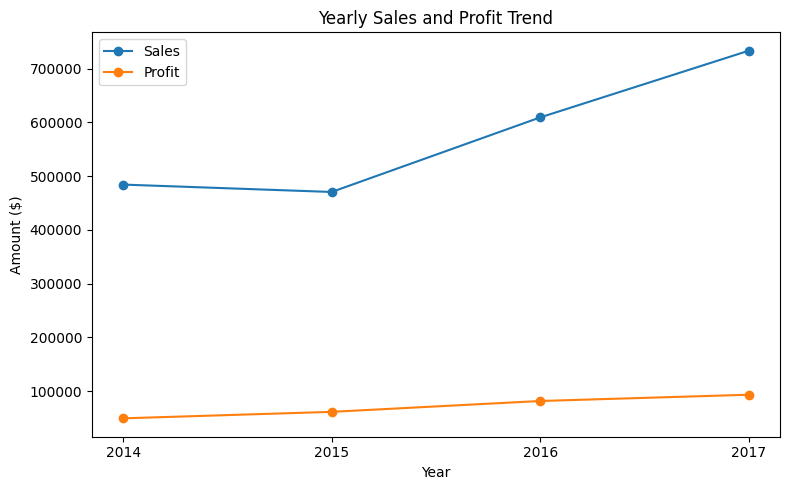

In [30]:
# Ensure figure directory exists
os.makedirs(FIG_DIR, exist_ok=True)

# Convert to datetime and extract integer year
superstore["order_date"] = pd.to_datetime(superstore["order_date"], errors="coerce")
superstore["year"] = superstore["order_date"].dt.year.astype("Int64")

# Group yearly totals
annual = (
    superstore.dropna(subset=["year"])
    .groupby("year", as_index=False)[["sales", "profit"]]
    .sum()
)

# ---- Plot ----
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(annual["year"], annual["sales"],  marker="o", label="Sales")
ax.plot(annual["year"], annual["profit"], marker="o", label="Profit")

ax.set(
    title="Yearly Sales and Profit Trend",
    xlabel="Year",
    ylabel="Amount ($)"
)
ax.legend()

# Force x-axis to show exact integer years
ax.set_xticks(annual["year"])
ax.set_xticklabels(annual["year"].astype(str))

fig.tight_layout()
fig.savefig(f"{FIG_DIR}/yearly_sales_profit_trend.png", dpi=150, bbox_inches="tight")
plt.show()

Discount vs Profit Relationship

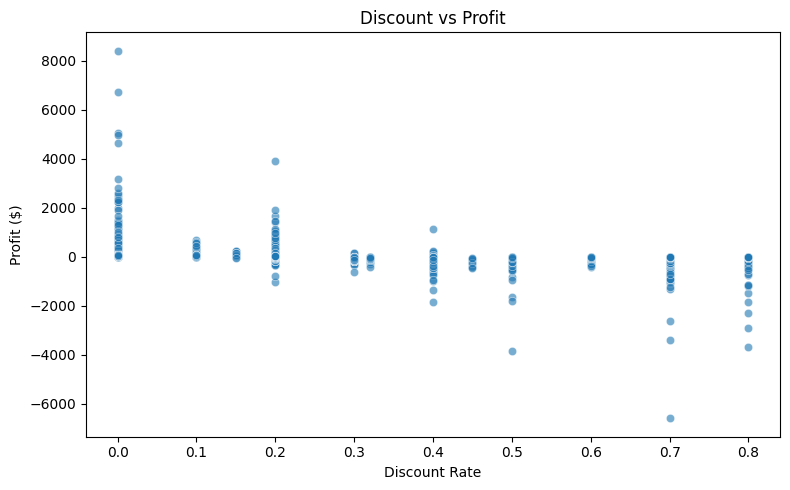

          discount    profit
discount  1.000000 -0.219487
profit   -0.219487  1.000000


In [31]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=superstore, x="discount", y="profit", alpha=0.6)
plt.title("Discount vs Profit")
plt.xlabel("Discount Rate")
plt.ylabel("Profit ($)")
plt.tight_layout()
plt.savefig(f"{FIG_DIR}/discount_vs_profit.png", dpi=150, bbox_inches="tight")
plt.show()

print(superstore[["discount","profit"]].corr())

In [32]:
con.close()
print("EDA finished successfully.")

EDA finished successfully.
